# PCA - Principle Component Analysis

- Standardize the d-dimensional dataset, X
- Construct covariance matrix 
- Decompose the covariance matrix into eigenvectors and eigenvalues
- Select k-eigenvectors that corresponds to the k largest eigenvalues, k is dimension of new feature space and k ≤ d
- Construct a projection matrix W from the top k eigenvectors
- Transform the d-dimensional input dataset of X using the projection matrix W to obtain new k-dimensional features subspace. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA, KernelPCA, LatentDirichletAllocation as LDA

from sklearn.linear_model import LogisticRegression

from mlxtend.plotting import plot_decision_regions

%matplotlib inline

In [2]:
wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header = None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
names = """Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,
Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,
Color intensity,Hue,OD280/OD315 of diluted wines,Proline""".replace("\n", "").split(",")

In [4]:
wine.columns = names
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
print("Unique classes: ", wine["Class"].unique())

Unique classes:  [1 2 3]


Let's see the class distribution

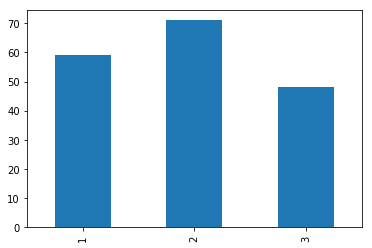

In [6]:
wine.Class.value_counts().sort_index().plot(kind = "bar")

In [7]:
X, y = wine.iloc[:, 1:].values, wine.iloc[:, 0].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print("Train X dimension: %s, Test X dimension: %s" % (X_train.shape, X_test.shape))

Train X dimension: (124, 13), Test X dimension: (54, 13)


In [9]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [10]:
X_train_cov = np.cov(X_train_std.T)
# cov function considers: each row of m represents a variable, 
# and each column a single observation of all those variables.
# resulting output will be d x d matrix, where d is no of the rows.
print("Dim of X_train: ", X_train_std.shape)
print("Dim of X_train_cov: ", X_train_cov.shape)

Dim of X_train:  (124, 13)
Dim of X_train_cov:  (13, 13)


In [11]:
eigen_vals, eigen_vectors = np.linalg.eig(X_train_cov)
print("Eigen values: %s" % (eigen_vals))
print("Eigen vectors, shape: ", eigen_vectors.shape)

Eigen values: [ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]
Eigen vectors, shape:  (13, 13)


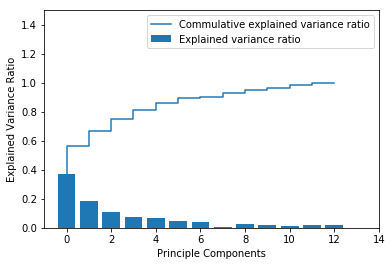

In [12]:
explained_variance = eigen_vals / eigen_vals.sum()
plt.bar(range(len(explained_variance)), explained_variance, label = "Explained variance ratio")
plt.step(range(len(explained_variance)), np.cumsum(explained_variance)
         , label = "Commulative explained variance ratio")
plt.xlim(-1, 14)
plt.ylim(0, 1.5)
plt.xlabel("Principle Components")
plt.ylabel("Explained Variance Ratio")
plt.legend(loc = "best")

In [13]:
k = 2
W = eigen_vectors[:, :k]
W

array([[ 0.14669811,  0.50417079],
       [-0.24224554,  0.24216889],
       [-0.02993442,  0.28698484],
       [-0.25519002, -0.06468718],
       [ 0.12079772,  0.22995385],
       [ 0.38934455,  0.09363991],
       [ 0.42326486,  0.01088622],
       [-0.30634956,  0.01870216],
       [ 0.30572219,  0.03040352],
       [-0.09869191,  0.54527081],
       [ 0.30032535, -0.27924322],
       [ 0.36821154, -0.174365  ],
       [ 0.29259713,  0.36315461]])

In [14]:
X_train_pca = X_train_std.dot(W)
X_test_pca = X_test_std.dot(W)

X_combined_pca = np.vstack((X_train_pca, X_test_pca))
y_combined = np.hstack((y_train, y_test))

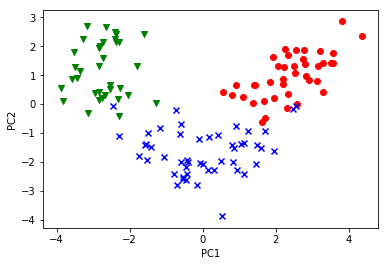

In [15]:
markers = ["o", "x", "v"]
colors = ["red", "blue", "green"]
for idx, cl in enumerate(np.unique(y_train)):
    X_train_filtered = X_train_pca[y_train == cl, :]
    plt.scatter(X_train_filtered[:, 0], X_train_filtered[:, 1], marker = markers[idx], color = colors[idx])

plt.xlabel("PC1")
plt.ylabel("PC2")

Accuracy score on pca data: 0.9815


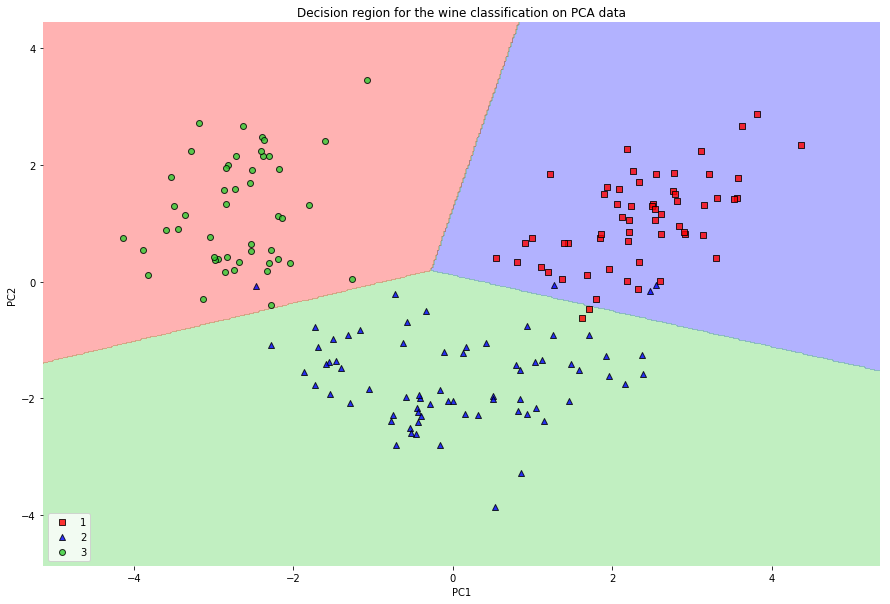

In [16]:
lr = LogisticRegression(C = 1000, random_state = 123, penalty = "l2")
lr.fit(X_train_pca, y_train)
score = lr.score(X_test_pca, y_test)
print("Accuracy score on pca data: %.4f" % score)

plt.figure(figsize = (15, 10))
plot_decision_regions(X_combined_pca, y_combined, lr)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Decision region for the wine classification on PCA data")
plt.legend(loc = "lower left")

# PCA using SciKit (Linear Transformation)

Accuracy score on pca data: 0.9815


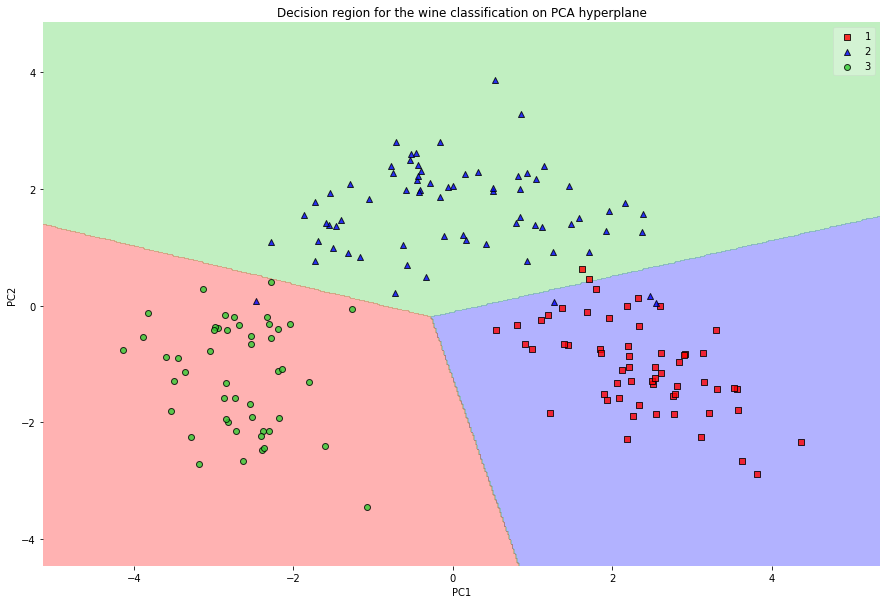

In [17]:
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

X_combined_pca = np.vstack((X_train_pca, X_test_pca))
y_combined = np.hstack((y_train, y_test))

lr = LogisticRegression(C = 1000, random_state = 0, penalty = "l2")
lr.fit(X_train_pca, y_train)
test_pred= lr.predict(X_test_pca)
score = accuracy_score(test_pred, y_test)
print("Accuracy score on pca data: %.4f" % score)

plt.figure(figsize = (15, 10))
plot_decision_regions(X_combined_pca, y_combined, lr)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Decision region for the wine classification on PCA hyperplane")


In [18]:
X_train_pca[:10, :]

array([[ 2.59891628, -0.00484089],
       [ 0.15819134,  2.26659577],
       [-2.6372337 , -2.66488569],
       [-2.52848449, -0.51846618],
       [ 1.70922581,  0.91719459],
       [-2.83057003, -0.41936129],
       [-2.82251879, -1.99763147],
       [ 1.36618015, -0.04639099],
       [-2.46584868,  0.07932269],
       [-2.28554906,  0.40096658]])

## Explained Variance Ratio

In [19]:
pca = PCA(n_components = None)
pca.fit(X_train_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

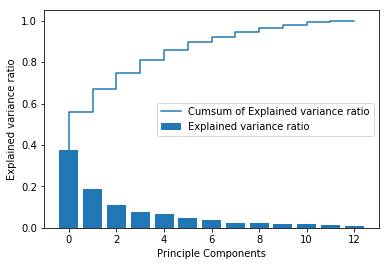

In [20]:
ratios = pca.explained_variance_ratio_
plt.bar(range(len(ratios)), ratios, label = "Explained variance ratio")
plt.step(range(len(ratios)), np.cumsum(ratios), label = "Cumsum of Explained variance ratio")
plt.legend(loc = "best")
plt.xlabel("Principle Components")
plt.ylabel("Explained variance ratio")

# Kernel PCA for non linear transformation

Accuracy score on kpca data: 0.9815


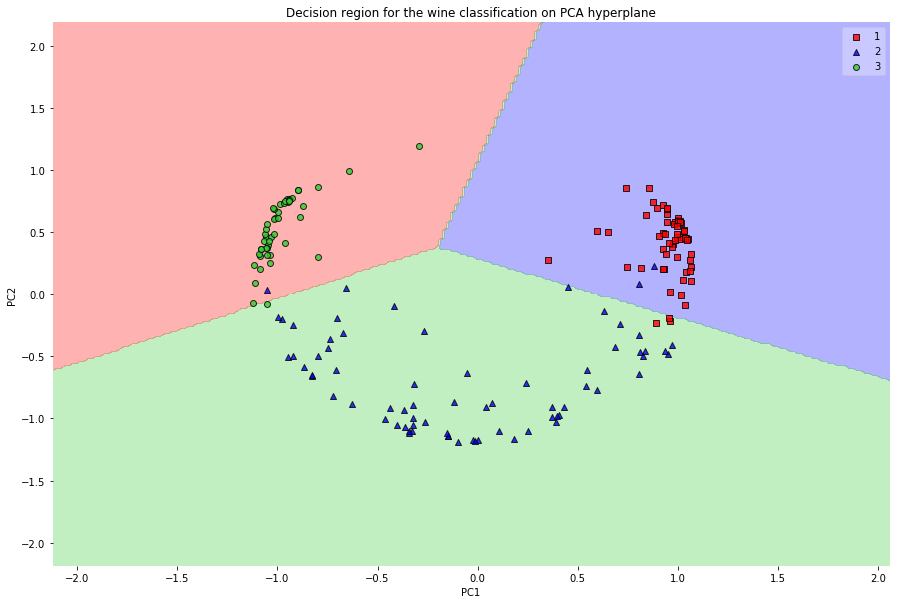

In [21]:
kpca = KernelPCA(n_components = 2, kernel = "sigmoid", gamma = 10)
kpca.fit(X_train_std)
X_train_kpca = kpca.transform(X_train_std)
X_test_kpca = kpca.transform(X_test_std)

X_combined_kpca = np.vstack((X_train_kpca, X_test_kpca))
y_combined = np.hstack((y_train, y_test))

lr = LogisticRegression(C = 1000, random_state = 0, penalty = "l2")
lr.fit(X_train_kpca, y_train)
test_pred= lr.predict(X_test_kpca)
score = accuracy_score(test_pred, y_test)
print("Accuracy score on kpca data: %.4f" % score)

plt.figure(figsize = (15, 10))
plot_decision_regions(X_combined_kpca, y_combined, lr)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Decision region for the wine classification on PCA hyperplane")
